<a href="https://colab.research.google.com/github/diegograndon/sieb/blob/main/Copia_de_chap03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You can order print and ebook versions of *Think Python 3e* from
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) and
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

In [16]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

Downloaded thinkpython.py
Downloaded diagram.py


# Functions

In the previous chapter we used several functions provided by Python, like `int` and `float`, and a few provided by the `math` module, like `sqrt` and `pow`.
In this chapter, you will learn how to create your own functions and run them.
And we'll see how one function can call another.
As examples, we'll display lyrics from Monty Python songs.
These silly examples demonstrate an important feature -- the ability to write your own functions is the foundation of programming.

This chapter also introduces a new statement, the `for` loop, which is used to repeat a computation.

## Defining new functions

A **function definition** specifies the name of a new function and the sequence of statements that run when the function is called. Here's an example:

In [17]:
import math
def rectangulo(lado):
  rectangulo = lado * 2
  print(rectangulo)

rectangulo(8)

16


`def` is a keyword that indicates that this is a function definition.
The name of the function is `print_lyrics`.
Anything that's a legal variable name is also a legal function name.

The empty parentheses after the name indicate that this function doesn't take any arguments.

The first line of the function definition is called the **header** -- the rest is called the **body**.
The header has to end with a colon and the body has to be indented. By convention, indentation is always four spaces.
The body of this function is two print statements; in general, the body of a function can contain any number of statements of any kind.

Defining a function creates a **function object**, which we can display like this.

In [18]:
rectangulo

<function __main__.rectangulo(lado)>

The output indicates that `print_lyrics` is a function that takes no arguments.
`__main__` is the name of the module that contains `print_lyrics`.

Now that we've defined a function, we can call it the same way we call built-in functions.

In [19]:
rectangulo(8)

16


When the function runs, it executes the statements in the body, which display the first two lines of "The Lumberjack Song".

## Parameters

Some of the functions we have seen require arguments; for example, when you call `abs` you pass a number as an argument.
Some functions take more than one argument; for example, `math.pow` takes two, the base and the exponent.

Here is a definition for a function that takes an argument.

In [23]:
def rectangulo1(lado1, lado2):
  rectangulo1 = lado1 * lado2
  print(rectangulo1)

The variable name in parentheses is a **parameter**.
When the function is called, the value of the argument is assigned to the parameter.
For example, we can call `print_twice` like this.

In [24]:
rectangulo1(8,9)

72


Running this function has the same effect as assigning the argument to the parameter and then executing the body of the function, like this.

In [25]:
lado1 = 45
lado2 = 89
area = lado1 * lado2
print(area)

4005


You can also use a variable as an argument.

In [26]:
lados1 = 9
rectangulo1(lados1, 3)

27


In this example, the value of `line` gets assigned to the parameter `string`.

## Calling functions

Once you have defined a function, you can use it inside another function.
To demonstrate, we'll write functions that print the lyrics of "The Spam Song" (<https://www.songfacts.com/lyrics/monty-python/the-spam-song>).

> Spam, Spam, Spam, Spam,  
> Spam, Spam, Spam, Spam,  
> Spam, Spam,  
> (Lovely Spam, Wonderful Spam!)  
> Spam, Spam,

We'll start with the following function, which takes two parameters.


In [27]:
def repeticiones(palabra, numero):
  repetir = palabra * numero
  print(repetir)

We can use this function to print the first line of the song, like this.

In [28]:
palabra = "bye, "
veces = 9
repeticiones(palabra, veces)

bye, bye, bye, bye, bye, bye, bye, bye, bye, 


To display the first two lines, we can define a new function that uses `repeat`.

In [31]:
def dosline():
  repeticiones(palabra, veces)
  repeticiones(palabra, veces)

And then call it like this.

In [32]:
dosline()

bye, bye, bye, bye, bye, bye, bye, bye, bye, 
bye, bye, bye, bye, bye, bye, bye, bye, bye, 


To display the last three lines, we can define another function, which also uses `repeat`.

In [33]:
def tresline():
  repeticiones(palabra, veces)
  print("chao, " * 4)
  repeticiones(palabra, veces)

In [34]:
tresline()

bye, bye, bye, bye, bye, bye, bye, bye, bye, 
chao, chao, chao, chao, 
bye, bye, bye, bye, bye, bye, bye, bye, bye, 


Finally, we can bring it all together with one function that prints the whole verse.

In [35]:
def todo():
  dosline()
  tresline()

In [36]:
todo()

bye, bye, bye, bye, bye, bye, bye, bye, bye, 
bye, bye, bye, bye, bye, bye, bye, bye, bye, 
bye, bye, bye, bye, bye, bye, bye, bye, bye, 
chao, chao, chao, chao, 
bye, bye, bye, bye, bye, bye, bye, bye, bye, 


When we run `print_verse`, it calls `first_two_lines`, which calls `repeat`, which calls `print`.
That's a lot of functions.

Of course, we could have done the same thing with fewer functions, but the point of this example is to show how functions can work together.

## Repetition

If we want to display more than one verse, we can use a `for` statement.
Here's a simple example.

In [38]:
for x in range(18):
  print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


The first line is a header that ends with a colon.
The second line is the body, which has to be indented.

The header starts with the keyword `for`, a new variable named `i`, and another keyword, `in`.
It uses the `range` function to create a sequence of two values, which are `0` and `1`.
In Python, when we start counting, we usually start from `0`.

When the `for` statement runs, it assigns the first value from `range` to `i` and then runs the `print` function in the body, which displays `0`.

When it gets to the end of the body, it loops back around to the header, which is why this statement is called a **loop**.
The second time through the loop, it assigns the next value from `range` to `i`, and displays it.
Then, because that's the last value from `range`, the loop ends.

Here's how we can use a `for` loop to print two verses of the song.

In [45]:
for x in range(2):
  print("Saludo Numero", x)
  todo()

Saludo Numero 0
bye, bye, bye, bye, bye, bye, bye, bye, bye, 
bye, bye, bye, bye, bye, bye, bye, bye, bye, 
bye, bye, bye, bye, bye, bye, bye, bye, bye, 
chao, chao, chao, chao, 
bye, bye, bye, bye, bye, bye, bye, bye, bye, 
Saludo Numero 1
bye, bye, bye, bye, bye, bye, bye, bye, bye, 
bye, bye, bye, bye, bye, bye, bye, bye, bye, 
bye, bye, bye, bye, bye, bye, bye, bye, bye, 
chao, chao, chao, chao, 
bye, bye, bye, bye, bye, bye, bye, bye, bye, 


You can put a `for` loop inside a function.
For example, `print_n_verses` takes a parameter named `n`, which has to be an integer, and displays the given number of verses.

In [47]:
def cuantos(n):
  for x in range(n):
    todo()
    print()

In this example, we don't use `i` in the body of the loop, but there has to be a variable name in the header anyway.

## Variables and parameters are local

When you create a variable inside a function, it is **local**, which
means that it only exists inside the function.
For example, the following function takes two arguments, concatenates them, and prints the result twice.

In [48]:
def union(a, b):
  union1 = a + b
  print(union1)

Here's an example that uses it:

In [50]:
linea = "Hola, "
linea2 = "como estas?"
union(linea, linea2)

Hola, como estas?


When `cat_twice` runs, it creates a local variable named `cat`, which is destroyed when the function ends.
If we try to display it, we get a `NameError`:

In [53]:
%%expect NameError

print(union1)

NameError: name 'union1' is not defined

Outside of the function, `cat` is not defined.

Parameters are also local.
For example, outside `cat_twice`, there is no such thing as `part1` or `part2`.

## Stack diagrams

To keep track of which variables can be used where, it is sometimes useful to draw a **stack diagram**.
Like state diagrams, stack diagrams show the value of each variable, but they also show the function each variable belongs to.

Each function is represented by a **frame**.
A frame is a box with the name of a function on the outside and the parameters and local variables of the function on the inside.

Here's the stack diagram for the previous example.

In [58]:
from diagram import make_frame, Stack

d1 = dict(line=linea, line2=linea2)
frame1 = make_frame(d1, name='__main__', dy=-0.3, loc='left')

d2 = dict(str1=linea, str2=linea2, conc1=linea+linea2)
frame2 = make_frame(d2, name='conc_str', dy=-0.3,
                    offsetx=0.03, loc='left')

d3 = dict(result=linea+linea2)
frame3 = make_frame(d3, name='two_lines',
                    offsetx=0.04, offsety=-0.3, loc='left')

d4 = {"result1": linea+linea2}
frame4 = make_frame(d4, name='?',
                    offsetx=-0.04, offsety=0, loc='left')

stack = Stack([frame1, frame2, frame3, frame4], dy=-0.8)

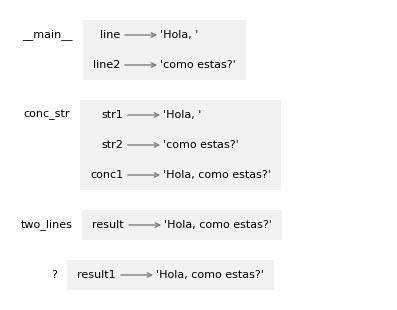

In [59]:
from diagram import diagram, adjust
width, height, x, y = [3.77, 2.9, 1.1, 2.65]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

The frames are arranged in a stack that indicates which function called
which, and so on. Reading from the bottom, `print` was called by `print_twice`, which was called by `cat_twice`, which was called by `__main__` -- which is a special name for the topmost frame.
When you create a variable outside of any function, it belongs to `__main__`.

In the frame for `print`, the question mark indicates that we don't know the name of the parameter.
If you are curious, ask a virtual assistant, "What are the parameters of the Python print function?"

## Tracebacks

When a runtime error occurs in a function, Python displays the name of the function that was running, the name of the function that called it, and so on, up the stack.
To see an example, I'll define a version of `print_twice` that contains an error -- it tries to print `cat`, which is a local variable in another function.

In [60]:
def doslines(str):
  print(union1)
  print(union1)

Now here's what happens when we run `cat_twice`.

In [61]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs, including a traceback.

%xmode Verbose

Exception reporting mode: Verbose


In [62]:
%%expect NameError

doslineas(linea1) #my function only takes one line as a parameter

NameError: name 'doslineas' is not defined

The error message includes a **traceback**, which shows the function that was running when the error occurred, the function that called it, and so on.
In this example, it shows that `cat_twice` called `print_twice`, and the error occurred in a `print_twice`.

The order of the functions in the traceback is the same as the order of the frames in the stack diagram.
The function that was running is at the bottom.

## Why functions?

It may not be clear yet why it is worth the trouble to divide a program into
functions.
There are several reasons:

-   Creating a new function gives you an opportunity to name a group of
    statements, which makes your program easier to read and debug.

-   Functions can make a program smaller by eliminating repetitive code.
    Later, if you make a change, you only have to make it in one place.

-   Dividing a long program into functions allows you to debug the parts
    one at a time and then assemble them into a working whole.

-   Well-designed functions are often useful for many programs. Once you
    write and debug one, you can reuse it.

## Debugging

Debugging can be frustrating, but it is also challenging, interesting, and sometimes even fun.
And it is one of the most important skills you can learn.

In some ways debugging is like detective work.
You are given clues and you have to infer the events that led to the
results you see.

Debugging is also like experimental science.
Once you have an idea about what is going wrong, you modify your program and try again.
If your hypothesis was correct, you can predict the result of the modification, and you take a step closer to a working program.
If your hypothesis was wrong, you have to come up with a new one.

For some people, programming and debugging are the same thing; that is, programming is the process of gradually debugging a program until it does what you want.
The idea is that you should start with a working program and make small modifications, debugging them as you go.

If you find yourself spending a lot of time debugging, that is often a sign that you are writing too much code before you start tests.
If you take smaller steps, you might find that you can move faster.

## Glossary

**function definition:**
A statement that creates a function.

**header:**
 The first line of a function definition.

**body:**
 The sequence of statements inside a function definition.

**function object:**
A value created by a function definition.
The name of the function is a variable that refers to a function object.

**parameter:**
 A name used inside a function to refer to the value passed as an argument.

**loop:**
 A statement that runs one or more statements, often repeatedly.

**local variable:**
A variable defined inside a function, and which can only be accessed inside the function.

**stack diagram:**
A graphical representation of a stack of functions, their variables, and the values they refer to.

**frame:**
 A box in a stack diagram that represents a function call.
 It contains the local variables and parameters of the function.

**traceback:**
 A list of the functions that are executing, printed when an exception occurs.

## Exercises

In [63]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

Exception reporting mode: Verbose


### Ask a virtual assistant

The statements in a function or a `for` loop are indented by four spaces, by convention.
But not everyone agrees with that convention.
If you are curious about the history of this great debate, ask a virtual assistant to "tell me about spaces and tabs in Python".

Virtual assistant are pretty good at writing small functions.

1. Ask your favorite VA to "Write a function called repeat that takes a string and an integer and prints the string the given number of times."

2. If the result uses a `for` loop, you could ask, "Can you do it without a for loop?"

3. Pick any other function in this chapter and ask a VA to write it. The challenge is to describe the function precisely enough to get what you want. Use the vocabulary you have learned so far in this book.

Virtual assistants are also pretty good at debugging functions.

1. Ask a VA what's wrong with this version of `print_twice`.

    ```
    def print_twice(string):
        print(cat)
        print(cat)
    ```
    
And if you get stuck on any of the exercises below, consider asking a VA for help.

### Exercise

Write a function named `print_right` that takes a string named `text` as a parameter and prints the string with enough leading spaces that the last letter of the string is in the 40th column of the display.

In [66]:
def print_right(text):
  espacios = 40 - len(text)
  print(" " * espacios + text)

Hint: Use the `len` function, the string concatenation operator (`+`) and the string repetition operator (`*`).

Here's an example that shows how it should work.

In [67]:
print_right("Monty")
print_right("Python's")
print_right("Flying Circus")

                                   Monty
                                Python's
                           Flying Circus


### Exercise

Write a function called `triangle` that takes a string and an integer and draws a pyramid with the given height, made up using copies of the string. Here's an example of a pyramid with `5` levels, using the string `'L'`.

In [68]:
def triangle(a, b):
  for x in range(b):
    espacios2 = "  " * (b - x)
    triangulo = (a + " ") * (2 * x + 1)
    print(espacios2 + triangulo)

In [69]:
triangle('L', 5)

          L 
        L L L 
      L L L L L 
    L L L L L L L 
  L L L L L L L L L 


### Exercise

Write a function called `rectangle` that takes a string and two integers and draws a rectangle with the given width and height, made up using copies of the string. Here's an example of a rectangle with width `5` and height `4`, made up of the string `'H'`.

In [70]:
def rectangle(str, largo, alto):
  for x in range(alto):
    print(str * largo)

In [71]:
rectangle('H', 5, 4)

HHHHH
HHHHH
HHHHH
HHHHH


### Exercise

The song "99 Bottles of Beer" starts with this verse:

> 99 bottles of beer on the wall  
> 99 bottles of beer  
> Take one down, pass it around  
> 98 bottles of beer on the wall  

Then the second verse is the same, except that it starts with 98 bottles and ends with 97. The song continues -- for a very long time -- until there are 0 bottles of beer.

Write a function called `bottle_verse` that takes a number as a parameter and displays the verse that starts with the given number of bottles.

Hint: Consider starting with a function that can print the first, second, or last line of the verse, and then use it to write `bottle_verse`.

In [72]:
def bottle_verse(num):
  print(f"{num} bottles of beer on the wall")
  print(f"{num} bottles of beer")
  print(f"Take one down, pass it around")
  print(f"{num-1} bottles of beer on the wall")

In [73]:
for num in range(99, 0, -1):
  bottle_verse(num)

99 bottles of beer on the wall
99 bottles of beer
Take one down, pass it around
98 bottles of beer on the wall
98 bottles of beer on the wall
98 bottles of beer
Take one down, pass it around
97 bottles of beer on the wall
97 bottles of beer on the wall
97 bottles of beer
Take one down, pass it around
96 bottles of beer on the wall
96 bottles of beer on the wall
96 bottles of beer
Take one down, pass it around
95 bottles of beer on the wall
95 bottles of beer on the wall
95 bottles of beer
Take one down, pass it around
94 bottles of beer on the wall
94 bottles of beer on the wall
94 bottles of beer
Take one down, pass it around
93 bottles of beer on the wall
93 bottles of beer on the wall
93 bottles of beer
Take one down, pass it around
92 bottles of beer on the wall
92 bottles of beer on the wall
92 bottles of beer
Take one down, pass it around
91 bottles of beer on the wall
91 bottles of beer on the wall
91 bottles of beer
Take one down, pass it around
90 bottles of beer on the wall
9

Use this function call to display the first verse.

In [74]:
bottle_verse(99)

99 bottles of beer on the wall
99 bottles of beer
Take one down, pass it around
98 bottles of beer on the wall


If you want to print the whole song, you can use this `for` loop, which counts down from `99` to `1`.
You don't have to completely understand this example---we'll learn more about `for` loops and the `range` function later.

In [77]:
for n in range(99, 0, -1):
    bottle_verse(n)
    print()

99 bottles of beer on the wall
99 bottles of beer
Take one down, pass it around
98 bottles of beer on the wall

98 bottles of beer on the wall
98 bottles of beer
Take one down, pass it around
97 bottles of beer on the wall

97 bottles of beer on the wall
97 bottles of beer
Take one down, pass it around
96 bottles of beer on the wall

96 bottles of beer on the wall
96 bottles of beer
Take one down, pass it around
95 bottles of beer on the wall

95 bottles of beer on the wall
95 bottles of beer
Take one down, pass it around
94 bottles of beer on the wall

94 bottles of beer on the wall
94 bottles of beer
Take one down, pass it around
93 bottles of beer on the wall

93 bottles of beer on the wall
93 bottles of beer
Take one down, pass it around
92 bottles of beer on the wall

92 bottles of beer on the wall
92 bottles of beer
Take one down, pass it around
91 bottles of beer on the wall

91 bottles of beer on the wall
91 bottles of beer
Take one down, pass it around
90 bottles of beer on th

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)